# Final Notebook 003 -  Data Analysis (Pointwise Mutual Information and Daily-wide Clustering)

## Import

In [2]:
import sentisignal
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np 
import pylab as P 
import ast
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import scipy.stats as s
import statsmodels.api as sm
import pprint
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from datetime import datetime
from yahoo_finance import Share
from pandas_datareader import data, wb
from statsmodels.graphics.api import qqplot
from operator import itemgetter
from decimal import *
from sklearn.neighbors.kde import KernelDensity

# plt.style.use('ggplot')
# sns.set_style("darkgrid")
# sns.set_context("notebook")

## Configuration

In [8]:
data_primary_path = '../../data/csv/stocktwits_twitter_withretweets_daily.csv'
data_symbology_path = '../../data/csv/symbology.csv'
data_pickles_path = '../../data/pickles/'
data_nasdaq_company_list_path = '../../data/nasdaq/companylist.csv'
start_date = '2012-01-01'
end_date = '2016-01-01'


## Reload Data

In [9]:
data_symbology = pd.read_csv(data_symbology_path)

### Use NASDAQ data to get top 250 companies by MarketCap

In [10]:
data_nasdaq_company_list = pd.read_csv(data_nasdaq_company_list_path)
data_nasdaq_top_250_mkt_cap = data_nasdaq_company_list.head(250)
data_nasdaq_top__mkt_cap_symbols = data_nasdaq_top_250_mkt_cap['Symbol'].unique()

### Load results from intermediate pickle

In [11]:
data_nasdaq_top_250_preprocessed_merge = pd.read_pickle(data_pickles_path+'intermediate/'+'data_nasdaq_top_250_preprocessed_merge_'+start_date+'_'+end_date)

### Load window results from intermediate pickle

In [12]:
data_nasdaq_top_250_preprocessed_merge_window_30 = pd.read_pickle(data_pickles_path+'intermediate/'+'data_nasdaq_top_250_preprocessed_merge_'+start_date+'_'+end_date+'_window_30')

## Data Analytics (No window)

### PMI (Pointwise Mutual Information)
#### Form a time series of mutual information values from single events per company

In [13]:
data_nasdaq_top_250_preprocessed_merge_daily_shift = sentisignal.split_apply_combine(data_nasdaq_top_250_preprocessed_merge, ['SYMBOL'], sentisignal.add_shift_data, 5, 'PCA_SENTIMENT')
data_nasdaq_top_250_preprocessed_merge_daily_pmi = sentisignal.split_apply_combine(data_nasdaq_top_250_preprocessed_merge_daily_shift, ['SYMBOL'], sentisignal.net_daily_pmi_info_surplus, 5, 'PCA_SENTIMENT', 'PCA_FINANCE')
pmi_constrained_pca = sentisignal.constrain_daily_pmi(data_nasdaq_top_250_preprocessed_merge_daily_pmi, 1, 'PCA_SENTIMENT', 'PCA_FINANCE')
sentisignal.plot_daily_inf_res(pmi_constrained_pca, symbols=[], plot_top=3)

len before constaining 235
len after constaining 235


NameError: name 'pmi_constrained_pca_change' is not defined

In [ ]:
data_nasdaq_top_250_preprocessed_merge_daily_shift = sentisignal.split_apply_combine(data_nasdaq_top_250_preprocessed_merge, ['SYMBOL'], sentisignal.add_shift_data, 5, 'PCA_SENTIMENT_CHANGE')
data_nasdaq_top_250_preprocessed_merge_daily_pmi = sentisignal.split_apply_combine(data_nasdaq_top_250_preprocessed_merge_daily_shift, ['SYMBOL'], sentisignal.net_daily_pmi_info_surplus, 5, 'PCA_SENTIMENT_CHANGE', 'PCA_FINANCE_CHANGE')
pmi_constrained_pca_change = sentisignal.constrain_daily_pmi(data_nasdaq_top_250_preprocessed_merge_daily_pmi, 1, 'PCA_SENTIMENT_CHANGE', 'PCA_FINANCE_CHANGE')
sentisignal.plot_daily_inf_res(pmi_constrained_pca_change, symbols=[], plot_top=3)

In [ ]:
sentisignal.kmeans(pmi_cluster_pca.loc[['AAPL']], ['max_pmi_is', 'optimal_lag', 'BULL_MINUS_BEAR', 'LOG_RETURN'], ['max_pmi_is', 'optimal_lag', 'BULL_MINUS_BEAR', 'LOG_RETURN', 'VOLUME', 'TOTAL_SCANNED_MESSAGES'], num_clusters=20)

In [ ]:
daily_cluster_list = ['BULL_MINUS_BEAR', 'BULL_BEAR_MSG_RATIO', 'TOTAL_SCANNED_MESSAGES', 'LOG_BULLISHNESS', 'LOG_RETURN', 'VOLATILITY', 'max_pmi_is', 'max_pmi', 'pos_lag_count']
daily_attr_list = daily_cluster_list

In [ ]:
df_daily_cluster = sentisignal.prep_daily_df_cluster(data_nasdaq_top_250_preprocessed_merge_daily_pmi)

clusters = sentisignal.kmeans(df_daily_cluster.loc[['AAPL']], daily_cluster_list, daily_attr_list, num_clusters=20)

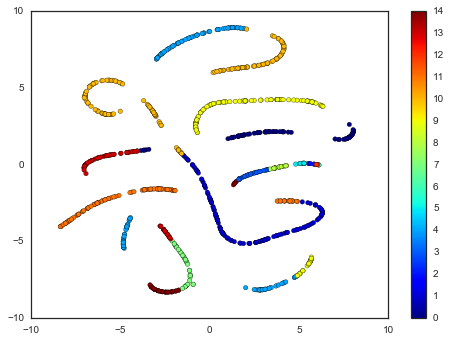

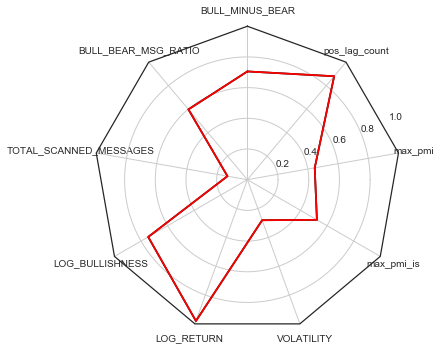

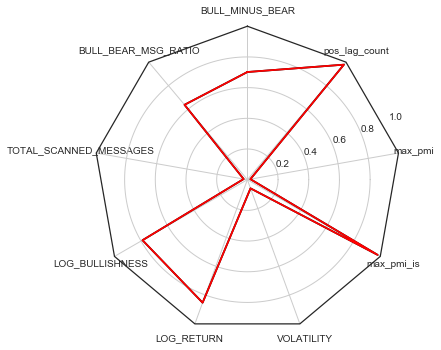

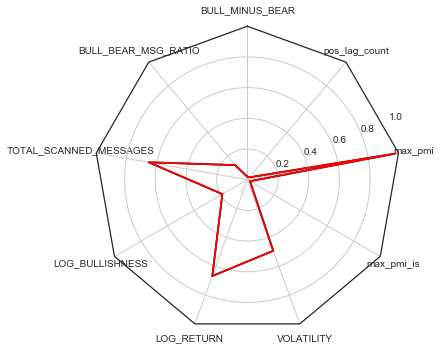

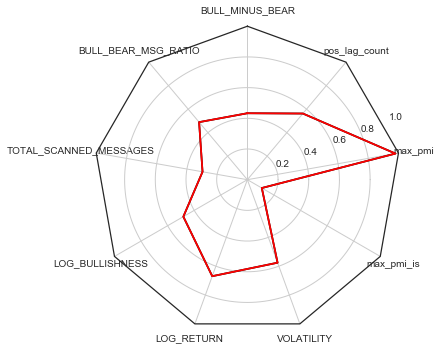

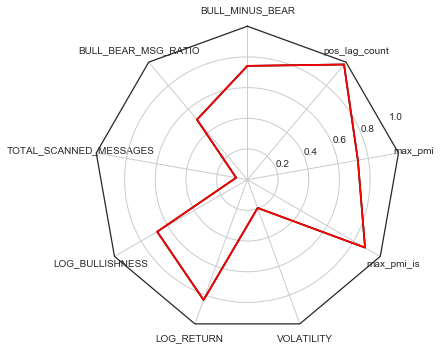

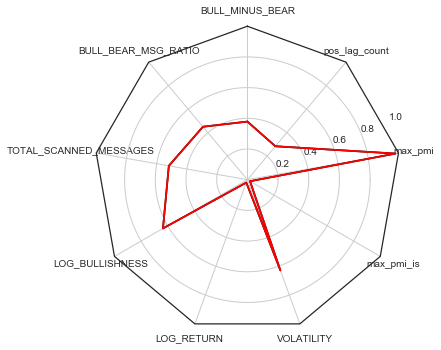

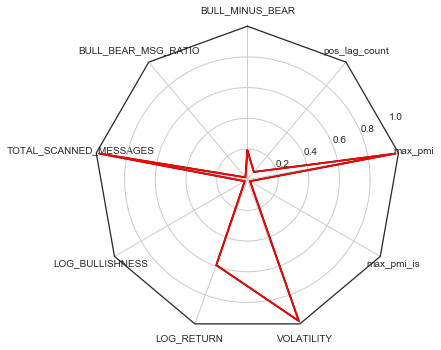

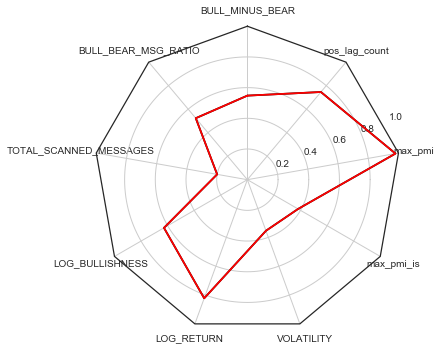

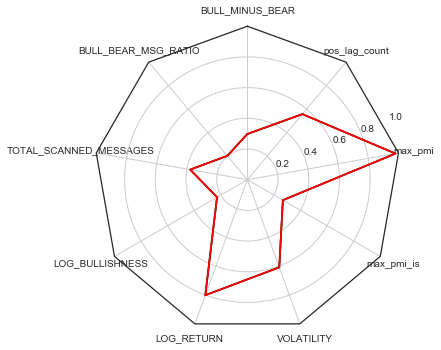

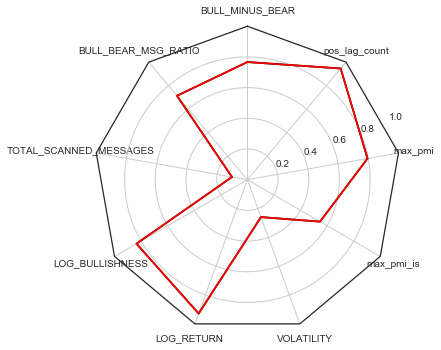

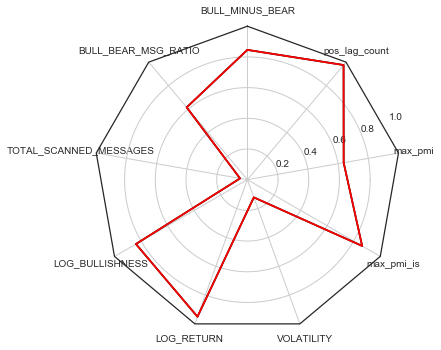

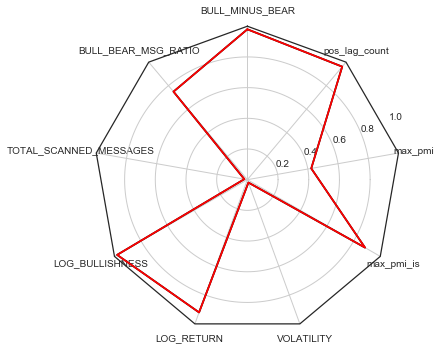

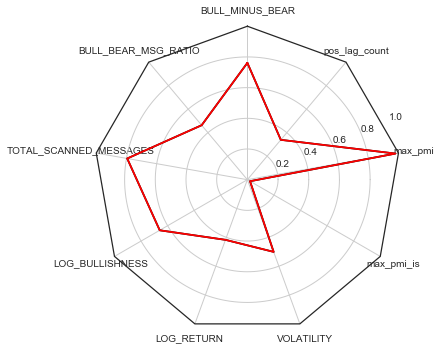

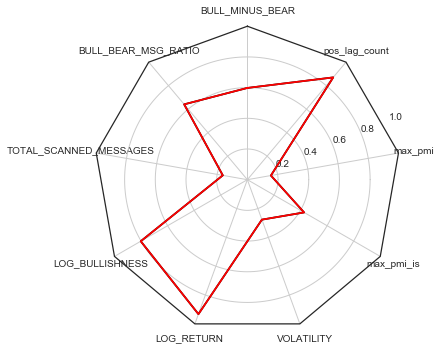

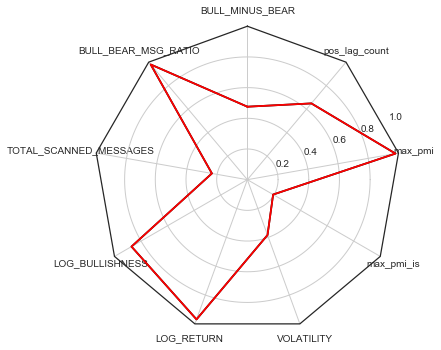

In [42]:
df_daily_cluster = sentisignal.prep_daily_df_cluster(data_nasdaq_top_250_preprocessed_merge_daily_pmi)

clusters = sentisignal.kmeans(df_daily_cluster.loc[['AAPL']], daily_cluster_list, daily_attr_list, num_clusters=15)

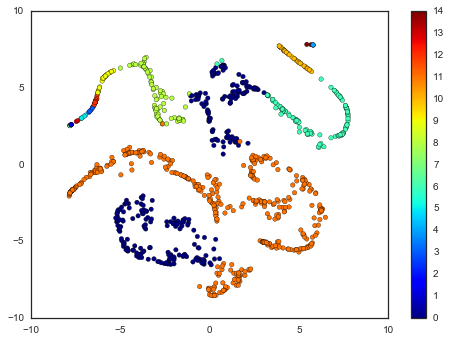

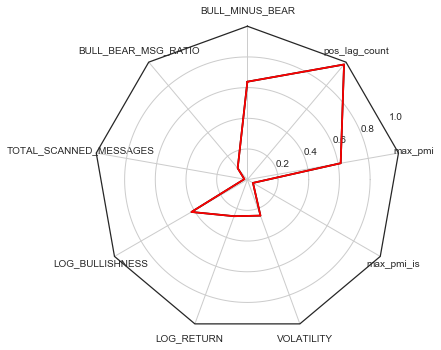

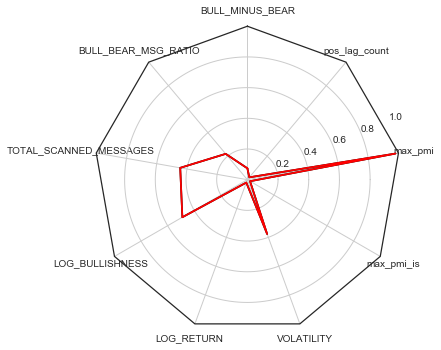

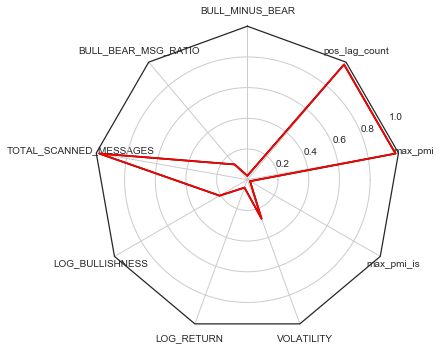

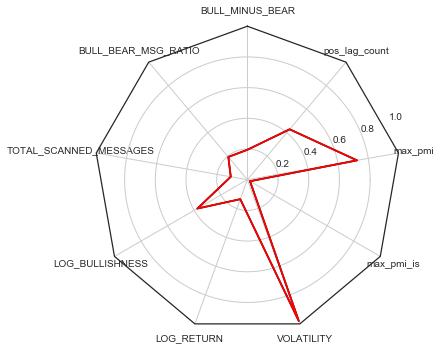

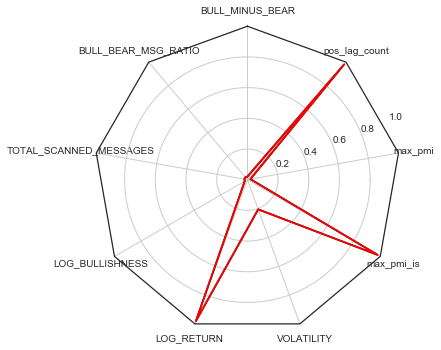

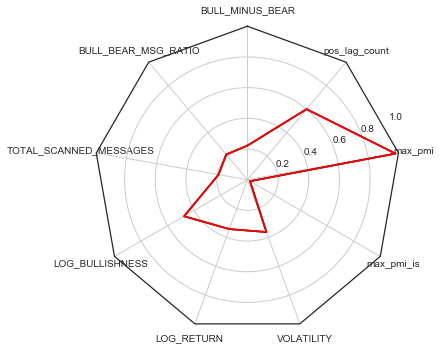

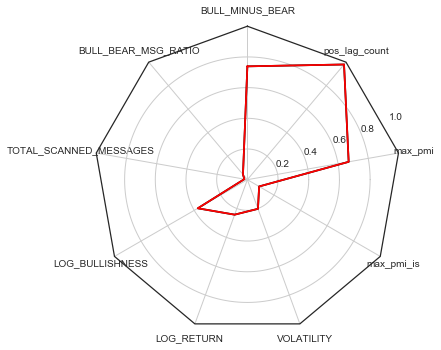

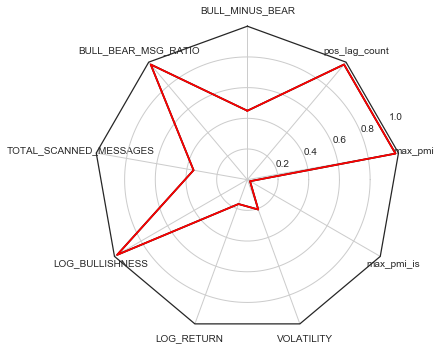

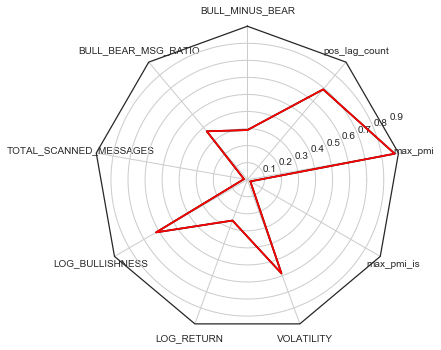

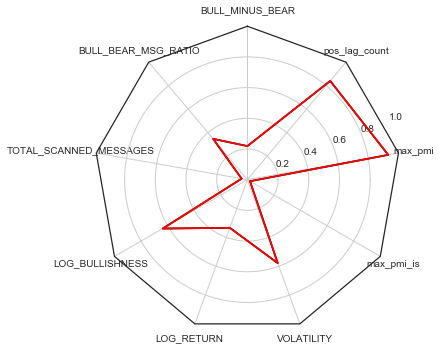

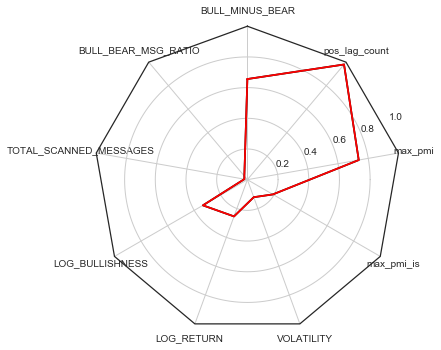

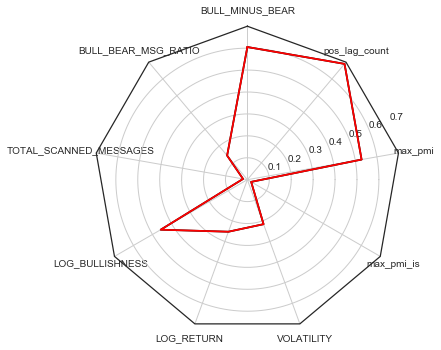

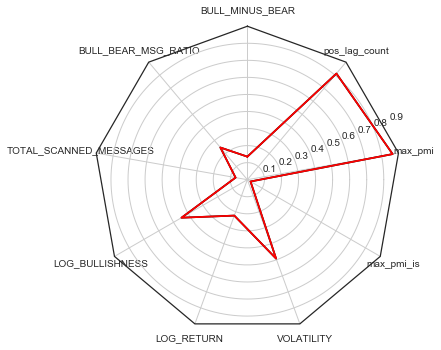

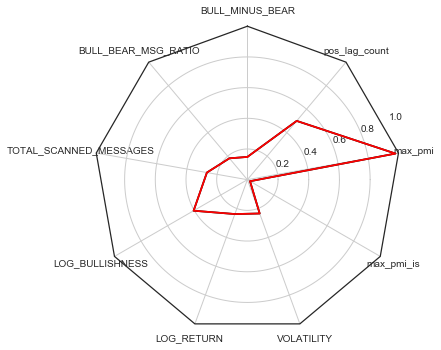

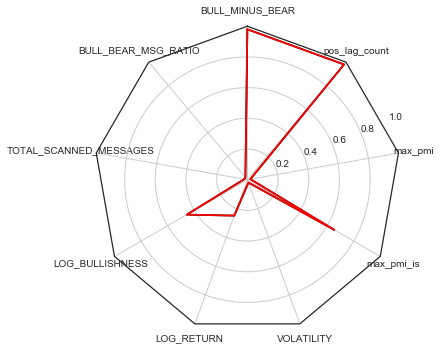

In [46]:
pmi_cluster_pca_change = sentisignal.prep_daily_df_cluster(pmi_constrained_pca_change)

pca_change_clusters = sentisignal.kmeans(df_daily_cluster.sample(1000), daily_cluster_list, daily_attr_list, num_clusters=15)

In [49]:
pca_change_clusters

,BULL_MINUS_BEAR,BULL_BEAR_MSG_RATIO,TOTAL_SCANNED_MESSAGES,LOG_BULLISHNESS,LOG_RETURN,VOLATILITY,max_pmi_is,max_pmi,pos_lag_count
kmeans_labels,,,,,,,,,
0,0.503420,0.854870,14.312268,0.489289,0.000664,2.051264,5.888696e+01,4.261378,6.000000
1,-0.162500,1.915000,4023.500000,0.606655,-0.041095,3.090000,3.686246e+00,6.902491,5.000000
2,-0.220000,1.130000,9052.000000,0.125899,-0.032037,2.230000,6.819529e-12,6.902743,6.000000
3,-0.020000,1.682857,995.857143,0.413199,-0.018817,8.182857,3.838851e+00,5.007586,5.428571
4,-0.250000,0.000000,2.333333,-0.231049,0.123832,1.696667,1.396071e+03,-0.002443,6.000000
5,0.012000,1.868000,1727.200000,0.584893,0.015414,2.980000,5.712623e+00,6.881922,5.600000
6,0.621583,0.387333,9.366667,0.407506,-0.001092,1.666083,1.234342e+02,4.626579,6.000000
7,0.280000,8.715000,3225.000000,1.481285,-0.013261,1.705000,8.839468e+00,6.853124,6.000000
8,0.093457,3.229259,120.456790,0.827569,0.000952,4.795309,1.669955e+01,6.056576,5.691358


In [51]:
pmi_cluster_pca_change.SECTOR.value_counts()

Technology          65107
Services            44915
Financial           29693
Healthcare          23337
Consumer Goods       9299
Industrial Goods     4995
Basic Materials       963
Name: SECTOR, dtype: int64

In [6]:
pmi_cluster_pca_change = sentisignal.prep_daily_df_cluster(pmi_constrained_pca_change)

pca_change_clusters = sentisignal.kmeans(df_daily_cluster.sample(100), daily_cluster_list, daily_attr_list, num_clusters=2, plot_pie=True)

NameError: name 'pmi_constrained_pca_change' is not defined

#### Shift finance data and and calculate PMI (per company)


## Data Analytics (with window)

### MI (Mutual Information)

In [ ]:
# def shift
data_nasdaq_top_250_preprocessed_window_30_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_250_preprocessed_merge_window_30, 'SYMBOL', sentisignal.net_information_surplus, 10, 'PCA_SENTIMENT', 'PCA_FINANCE', -1)
data_nasdaq_top_250_preprocessed_window_30_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_250_preprocessed_window_30_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_250_preprocessed_window_30_mi_res_net_constrained)

In [ ]:
# def shift
data_nasdaq_top_250_preprocessed_window_30_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_250_preprocessed_merge_window_30, 'SYMBOL', sentisignal.net_information_surplus, 10, 'BULL_MINUS_BEAR', 'LOG_RETURN', -1)
data_nasdaq_top_250_preprocessed_window_30_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_250_preprocessed_window_30_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_250_preprocessed_window_30_mi_res_net_constrained)